In [3]:
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import umap

In [2]:
%cd ..

/Users/lukakarginov/Documents/Classes/20.440/20.440_project


In [16]:
p8 = mmread('data/s9_rosa26WT_p8/matrix.mtx')
p15 = mmread('data/GSM5520360_S9WT-P15/matrix.mtx')

In [4]:
barcodes = pd.read_csv('data/s9_rosa26WT_p8/barcodes.tsv',sep = '\t', header = None)
features = pd.read_csv('data/s9_rosa26WT_p8/features.tsv',sep = '\t', header = None)

In [27]:
#cells x Genes
counts = np.array(p8.todense()).T

(array([2083., 1167., 1142., 1238.,  325.,  153.,   73.,   30.,    9.,
           4.]),
 array([  500. ,  4541.4,  8582.8, 12624.2, 16665.6, 20707. , 24748.4,
        28789.8, 32831.2, 36872.6, 40914. ]),
 <BarContainer object of 10 artists>)

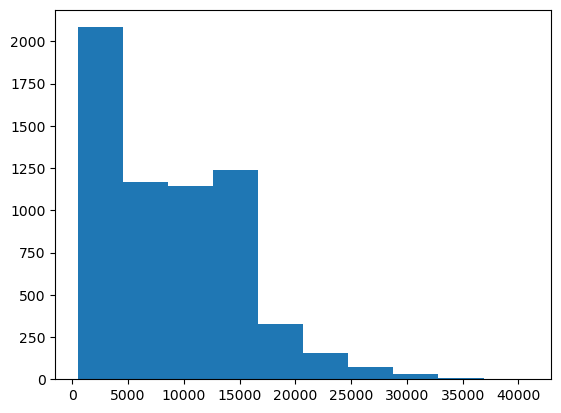

In [28]:
plt.hist(np.sum(counts, axis = 1))

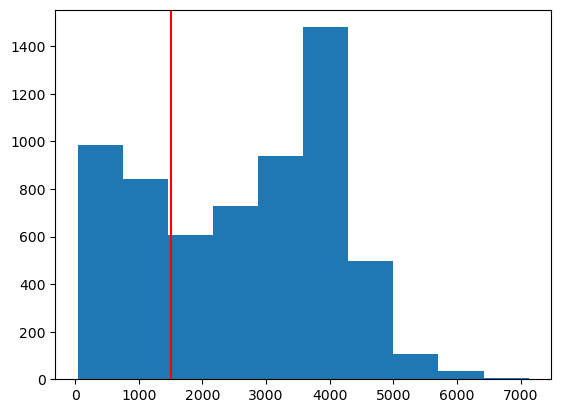

In [29]:
plt.hist(np.sum(counts != 0, axis = 1 ))
plt.axvline(1500, color = 'r')
counts_filt = np.sum(counts != 0, axis = 1 ) > 1500
filt = counts[counts_filt,:]

In [30]:
tot_mol = np.sum(filt, axis = 1)
norm = np.log10( np.divide(filt.T, tot_mol).T * 10000 + 1)

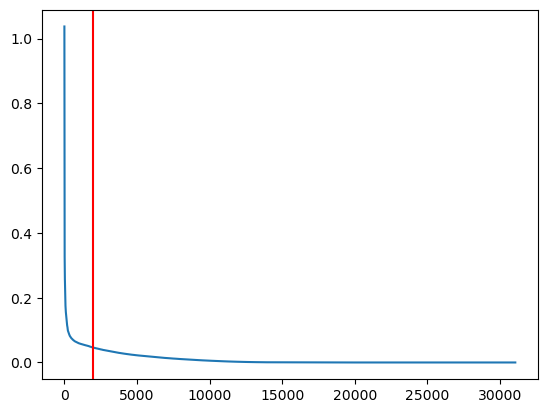

In [31]:
features_var = norm.var(axis = 0)
sort_idx = np.argsort(np.array(features_var))
plt.plot(np.arange(0,len(features_var)),features_var[sort_idx][::-1])
plt.axvline(2000, color = 'r')
vargenes = norm[:,sort_idx[::-1][0:2000]]

array([0.12092242, 0.07243233, 0.05090019, 0.03724203, 0.02288518,
       0.01665245, 0.01516412, 0.01306456, 0.01164379, 0.00883719])

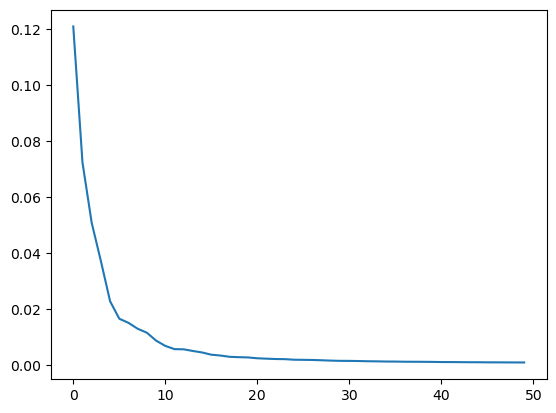

In [32]:
pca = PCA()
exp_pca = pca.fit_transform(vargenes)

#Variance Explained
plt.plot(pca.explained_variance_ratio_[0:50])
pca.explained_variance_ratio_[0:10]

In [24]:
reduce = umap.UMAP()
exp_umap = reduce.fit_transform(exp_pca[:,:10])

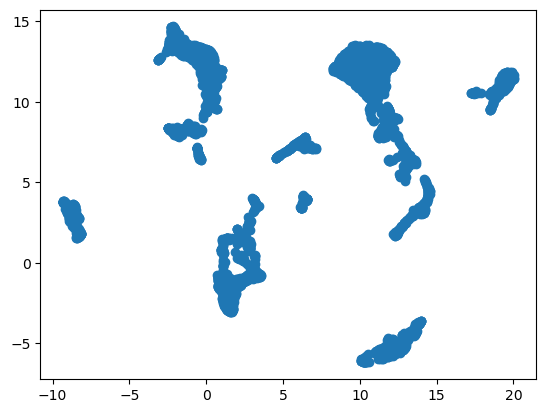

In [33]:
plt.plot(exp_umap[:,0],exp_umap[:,1],'o')
plt.show()

In [4]:
fig = plt.figure()
ax = plt.Subplot(fig, 111)
ax.plot([0,1,2],[0,1,2],'o')

ax.set_ylabel('UMAP2')
ax.set_xlabel('UMAP1')
plt.show()

<Figure size 640x480 with 0 Axes>